# Belajar Python untuk Analisis Data -- Sesi 02
## disusun oleh Bagus Sartono dan Mulianto Raharjo

# -------------------------------------------------------

# Mendeskripsikan Data

## Membuat Tabel Frekuensi dari Variabel Kategorik

Sesi ini akan diawali dengan menampilkan deskripsi data kategorik dalam bentuk tabel frekuensi.  Tabel frekuensi adalah tabel yang menyajikan banyaknya amatan untuk setiap kategori variabel.  Misalnya saja kalau kita memiliki variabel jenis kelamin, kita barangkali tertarik untuk menyajikan berapa banyak individu yang laki-laki dan berapa banyak yang perempuan.

Sebagai ilustrasi, kita akan gunakan data 'rumah' yang sudah kita gunakan sebelumnya pada Sesi 01

In [1]:
#Pertama... kita import data terlebih dahulu
import pandas as pd
rumah = pd.read_csv('D:/rumah.csv')

Pada dataframe rumah terdapat variabel dengan nama 'dekattol' dimana hanya ada 2 kategori, yaitu 0 jika rumahnya tidak berdekatan dengan jalan tol, dan 1 jika rumahnya berdekatan dengan jalan.  Berapa banyak yang masuk dalam kategori 0 dan kategori 1, berikut ini caranya

In [8]:
pd.crosstab(index=rumah['dekattol'], columns="frekuensi")

col_0,frekuensi
dekattol,
0,46
1,16


Tentu saja kita juga bisa menampilkan tabel dalam bentuk persentasenya.  Cara yang paling sederhana adalah membuat tabel berisi frekuensi terlebih dahulu kemudian membaginya dengan banyaknya amatan yang diperoleh menggunakan fungsi count().

In [11]:
pd.crosstab(index=rumah['dekattol'], columns="persentase") / rumah['dekattol'].count()

col_0,persentase
dekattol,
0,0.741935
1,0.258065


In [27]:
#atau mungkin lebih senang dalam bentuk seperti ini
round(pd.crosstab(index=rumah['dekattol'], columns="persentase") / rumah['dekattol'].count()*100,2)

col_0,persentase
dekattol,
0,74.19
1,25.81


Penyajian tabel frekuensi di atas barangkali akan lebih menarik jika disajikan dalam bentuk PIE CHART.

Fungsi yang dapat digunakan adalah pie yang ada pada modul matplotlib

Argumen dari fungsi tersebut antara lain adalah size yang merupakan ukuran dari juring, labels yang berisi nama-nama kategori yang digambarkan, dan shadow untuk menambahkan bayangan pada gambar.

opsi lainnya adalah explode untuk menggeser satu atau beberapa slice/juring

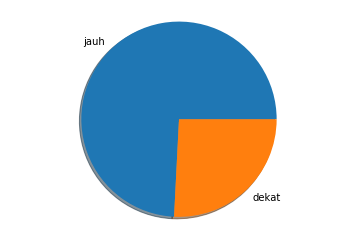

In [60]:
import matplotlib.pyplot as plt
tabel = pd.crosstab(index=rumah['dekattol'], columns="frekuensi")

label = 'jauh', 'dekat'
plt.pie(tabel['frekuensi'], shadow=True, labels=label)
plt.axis('equal')
plt.show()

# Menampilkan Statistik Deskriptif Variabel Numerik

Untuk variabel yang bersifat numerik, kita umumnya umumnya tertarik pada ringkasan data berupa berbagai statistik deskriptif yang menggambarkan ukuran pemusatan dan ukuran penyebaran.

Ukuran pemusatan tersebut antara lain: RATA-RATA, MEDIAN, dan MODUS
sedangkan ukuran penyebaran dapat berupa: STANDARD DEVIATION, RAGAM (Variane), serta berbagai nilai QUANTILE

Kita mungkin juga tertarik pada statistik yang menggambarkan bentuk sebaran data, seperti KURTOSIS dan SKEWNESS

berikut ini beberapa fungsi yang dapat digunakan (tentu saja masih terdapat fungsi-fungsi lainnya yang menghasilkan output serupa)

In [46]:
#menyajikan RATA-RATA dari variabel luasbangunan
rumah['luasbangunan'].mean()

164.59677419354838

In [33]:
#menyajikan MEDIAN dari variabel luasbangunan
rumah['luasbangunan'].median()

137.0

In [34]:
#menyajikan SIMPANGAN BAKU (Standard Deviation) dari variabel luasbangunan
rumah['luasbangunan'].std()

72.276441001545

In [35]:
#menyajikan KURTOSIS dari variabel luasbangunan
rumah['luasbangunan'].kurtosis()

-0.49695423220254975

In [38]:
#menyajikan SKEWNESS dari variabel luasbangunan
rumah['luasbangunan'].skew()

0.7645396053445936

In [37]:
#menyajikan QUANTILE(20%) dari variabel luasbangunan
rumah['luasbangunan'].quantile(0.2)

103.2

In [30]:
#menyajikan beberapa statistik deskriptif sekaligus
rumah['luasbangunan'].describe()

count     62.000000
mean     164.596774
std       72.276441
min       66.000000
25%      114.000000
50%      137.000000
75%      219.500000
max      331.000000
Name: luasbangunan, dtype: float64

Ada kalanya kita tertarik untuk mendeskripsikan sebaran data numerik dalam bentuk visual seperti HISTOGRAM dan BOXPLOT

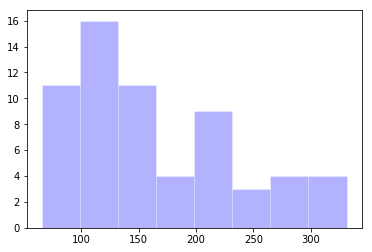

In [70]:
#membuat histogram dengan 8 bins
#warna batang biru, dengan konsentrasi 30%
plt.hist(rumah['luasbangunan'], 8,  edgecolor='white', facecolor='blue', alpha=0.3)
plt.show()

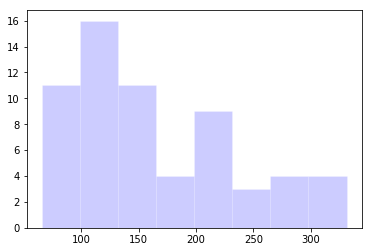

In [69]:
#membuat histogram dengan 12 bins
#warna batang biru, dengan konsentrasi 20%
plt.hist(rumah['luasbangunan'], 8,  edgecolor='white', facecolor='blue', alpha=0.2)
plt.show()

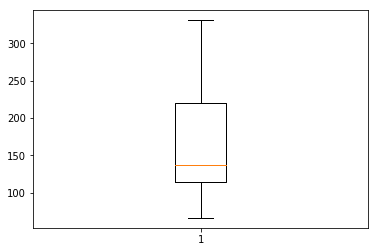

In [52]:
#membuat BOXPLOT dengan posisi VERTIKAL
plt.boxplot(rumah['luasbangunan'])
plt.show()

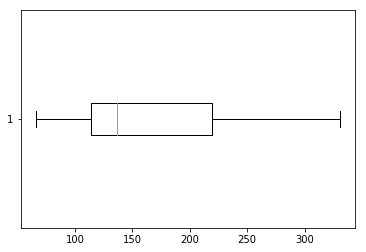

In [61]:
#membuat BOXPLOT dengan posisi HORIZONTAL
plt.boxplot(rumah['luasbangunan'], vert=False)
plt.show()

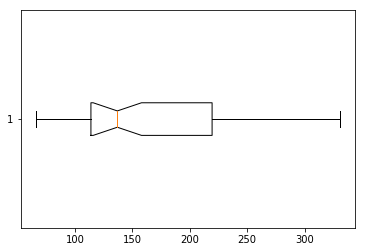

In [71]:
#membuat BOXPLOT dengan posisi HORIZONTAL dengan NOTCH pada bagian median
plt.boxplot(rumah['luasbangunan'], vert=False, notch=True)
plt.show()